# *Group D - Real estate analysis in Tel Aviv for the past 20 years*


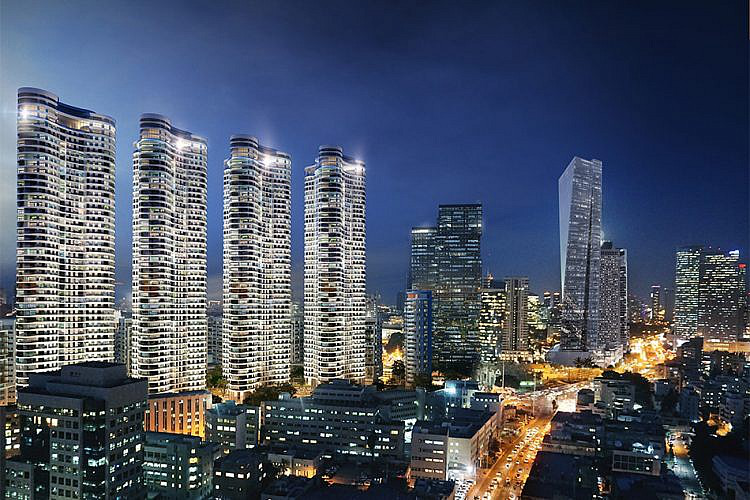

In [1]:
url = "https://medias.timeout.co.il/www/uploads/2019/07/20180318173720-b-750x500.jpg"
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen(url))
img

<br>

## Business Understanding:

#### Analyzing the real-estate market in Tel Aviv helps us determine which measurable factors and attributes influences transactions.
#### This information can assist in making important business decisions in various areas (e.g. marketing, investments, construction planning etc.)

<br>

## Data Understanding:

#### The Data is taken from the National website for real-estate, in the following link:
#### https://www.nadlan.gov.il/
#### The data presents information about real-estate transactions that were made in Tel Aviv (e.g. full address, prices, total area, number of rooms, date of the transaction etc.)
#### we made 4 general observations, we will take a deep look into them in the following document.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

font1 = {'family':'serif','color':'darkblue','size':25}
font2 = {'family':'serif','color':'blue','size':15}

file = "https://raw.githubusercontent.com/chenavichai/D_GROUP_DATA/main/real_estate_data.csv"
data = pd.read_csv(file, encoding = "utf8")

<br>


## Data Preparation:

In [3]:
data = data[data["מהות הזכות"]!="בעלות בנכס מוגן"]
data = data[data["מחיר מוצהר"]>=1000]
df = data[["תאריך עסקה","רחוב","מחיר מוצהר","שטח ברוטו","חדרים","מחיר למר","מחיר לחדר","קומה","קומות","דירות בבנין","חניה","גג","חצר","שנת בניה","שומה חלקים"]].copy()
df["שנת עסקה"] = pd.DatetimeIndex(df["תאריך עסקה"]).year
df["חודש עסקה"] = pd.DatetimeIndex(df["תאריך עסקה"]).month
df["יום עסקה"] = pd.DatetimeIndex(df["תאריך עסקה"]).day
df.head()

,תאריך עסקה,רחוב,מחיר מוצהר,שטח ברוטו,חדרים,מחיר למר,מחיר לחדר,קומה,קומות,דירות בבנין,חניה,גג,חצר,שנת בניה,שומה חלקים,שנת עסקה,חודש עסקה,יום עסקה
0,25/03/2021,בק ישראל,3346000,69.0,3.0,48493.0,1115333.0,5.0,7.0,20.0,1.0,0.0,0.0,2021.0,1,2021,3,25
1,22/03/2021,בק ישראל,2882500,60.0,3.0,48042.0,960833.0,4.0,7.0,20.0,1.0,0.0,0.0,2021.0,1,2021,3,22
2,16/03/2021,בק ישראל,3170000,83.0,3.0,38193.0,1056667.0,5.0,7.0,20.0,1.0,0.0,0.0,2021.0,1,2021,3,16
3,11/03/2021,בק ישראל,2280000,50.0,2.0,45600.0,1140000.0,2.0,7.0,20.0,1.0,0.0,0.0,2021.0,1,2021,11,3
4,11/03/2021,קארו יוסף,1750000,35.0,2.0,58333.0,875000.0,2.0,7.0,26.0,1.0,0.0,0.0,1995.0,1,2021,11,3


<br>


## Pareto principle:

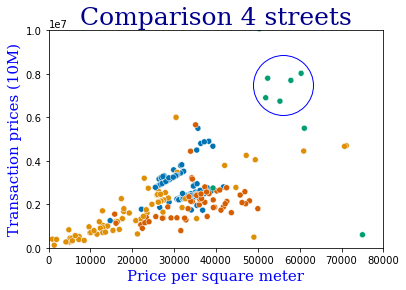

In [4]:
four_streets = df[ (df["רחוב"]=="הצנחנים") | (df["רחוב"]=="פלורנטין") | (df["רחוב"]=="יפת") | (df["רחוב"]=="בלפור") ].copy()

#four_streets["רחוב"]=four_streets["רחוב"].astype('category').cat.codes

plt.ylim(0, 10000000)
plt.xlim(0, 80000)
ax = sns.scatterplot(data=four_streets, x="מחיר למר", y="מחיר מוצהר",hue = 'רחוב', palette = 'colorblind', legend = False)

ax.set_title("Comparison 4 streets",fontdict = font1)
ax.set_xlabel("Price per square meter",fontdict = font2)
ax.set_ylabel("Transaction prices (10M)",fontdict = font2)

ax.plot([56000],[7500000],'o',ms=60,mec='b',mfc='none')

Text(0.5, 1.0, 'Pareto Principle - streets and transactions')

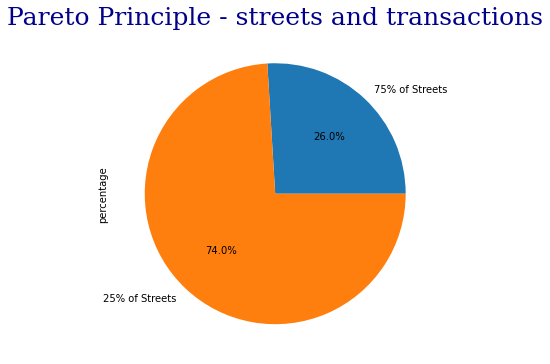

In [5]:
temp = df.groupby("רחוב")["מחיר מוצהר"].sum().sort_values()

sum75 = sum(temp[0:int(len(temp)*0.75)])
sum25 = sum(temp[int(len(temp)*0.75):])

pai = pd.DataFrame({"percentage":[sum75,sum25]},
                  index=['75% of Streets', '25% of Streets'])

plot = pai.plot.pie(y="percentage", figsize=(6,6),autopct='%1.1f%%',legend=False)
plt.title("Pareto Principle - streets and transactions",fontdict = font1)


#### **Observation 1:**
##### Pareto Principle – transactions that were made on 25% of the streets constitute in fact 75 % of the total amount of transaction prices in Tel Aviv.
##### When a developer or contractor is looking for a place to carry out a project or TMA 38 - we recommend that they focus on 25 percent of the city's "significant" streets, which will guarantee them a lower risk profit.

<br>


## Best day and month to advertise an apartment:

Text(0, 0.5, 'Amount of deals')

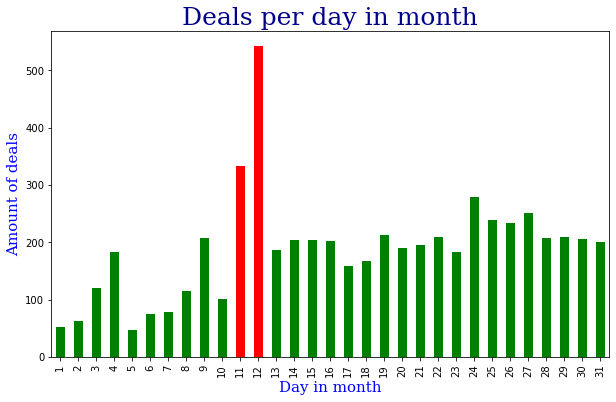

In [6]:
temp = df.groupby("יום עסקה")["מחיר מוצהר"].count()
my_colors = ['g']*10+["r"]*2+['g']*19
ax = temp.plot(figsize=(10,6),kind="bar", stacked=True,color = my_colors)
plt.title("Deals per day in month",fontdict = font1)
ax.set_xlabel("Day in month",fontdict = font2)
ax.set_ylabel("Amount of deals",fontdict = font2)

Text(0, 0.5, 'Deals')

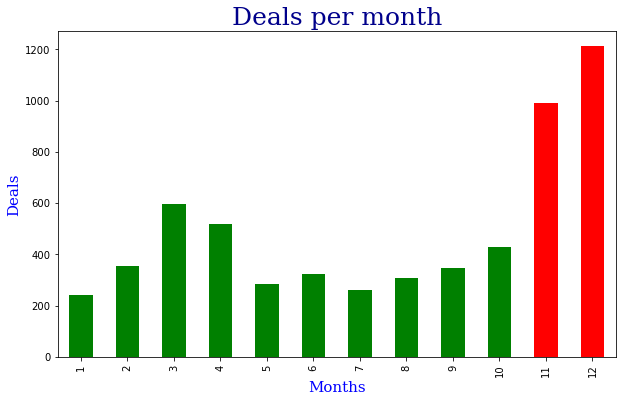

In [7]:
temp = df.groupby("חודש עסקה")["מחיר מוצהר"].count()
my_colors = ['g']*10+["r"]*2
ax = temp.plot(figsize=(10,6),kind="bar",color=my_colors)
plt.title("Deals per month",fontdict = font1)
ax.set_xlabel("Months",fontdict = font2)
ax.set_ylabel("Deals",fontdict = font2)

#### **Observation 2:**
##### The 11th and 12th of each month are the dates with the highest number of transactions, and the months with the highest number of transactions are November and December.
##### We assume that right after the paycheck enters in the beginning of the month – somewhere between the 1th and the 10th – more people feel more comfortable purchasing new apartments. Also, many potential buyers tend to prepare for the winter that includes making sure they have a roof on top of their heads, and therefore more transactions occur in November-December.
##### Knowing the "hot" days and months of the year, can give the seller an advantage in planning the advertising date of the apartment + putting pressure on the buyer at these times.


<br>

## The influence of each attribute of the apartment on transactions

Text(0.5, 1.0, 'Feature importances')

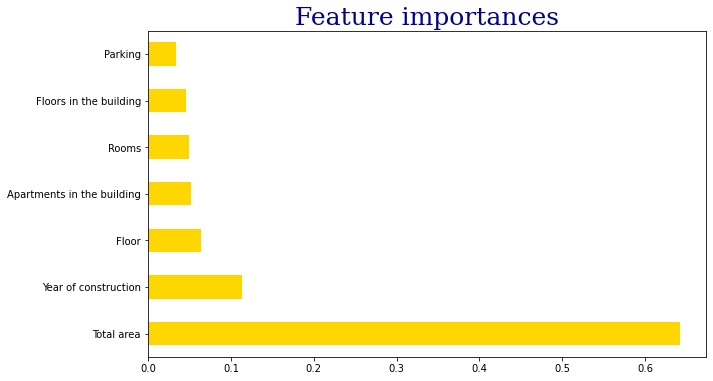

In [8]:
df = df.fillna(0)
df= df[df["שטח ברוטו"]>0]

features = ["חניה","שטח ברוטו","חדרים","קומה","קומות","דירות בבנין","שנת בניה"]
pred_label = ["מחיר מוצהר"]

df2 = df[features]

X = df2
y = df[pred_label]

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=3) 

# Define model.
df_model = DecisionTreeRegressor(random_state=1)

# Fit model
df_model.fit(X_train, y_train)

#print("MSE: {:.3f}".format(mse(pred,y_test,squared=False))) # MSE is the mean square error, a measure for data validation
df_model.feature_importances_
feature_importances = pd.DataFrame(df_model.feature_importances_,
                                   index = df2.columns[:],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
temp = feature_importances.head(10)

temp2 = temp.rename(index={'שטח ברוטו': 'Total area','שנת בניה': 'Year of construction','קומה': 'Floor','דירות בבנין': 'Apartments in the building','חניה': 'Parking','קומות': 'Floors in the building','חדרים': 'Rooms'})
temp2.plot(figsize=(10,6),kind="barh",color="gold",legend=False)
plt.title("Feature importances",fontdict = font1)


#### **Observation 3:**
##### The data presents the different factors that were taken into account in the decision-making process of each transaction and orders them according to their relative importance.
##### From the data, we can see that the total area of the apartment is the most important factor, and its relative importance is 63%. On the other side, the least important factor if the property has parking spot – 04%.
##### This information is valuable for accurate marketing. In order to sell the property, it is worth knowing the important factors and referring to them in presenting the property to a potential buyer.


<br>

## Transaction prices by floors

(0.0, 8000000.0)

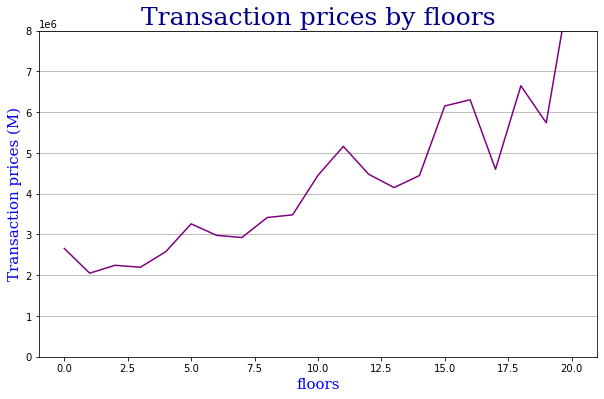

In [9]:
price_by_floor = df.groupby("קומה")["מחיר מוצהר"].mean().head(21)

pf = price_by_floor.plot(figsize=(10,6),linestyle="-",color = "purple")
plt.title("Transaction prices by floors",fontdict = font1)
pf.set_ylabel("Transaction prices (M)",fontdict = font2)
pf.set_xlabel("floors",fontdict = font2)
plt.grid(axis = 'y')
plt.ylim(0, 8000000)

#### **Observation 4:**
##### The total price of the apartment is raised for higher-floor apartments.
##### We assume that some factors might be considered as luxury, and in general they appear on high-floors. Therefore, if the property contains them, it raises the value and price.
##### Examples for luxury factors can be - better view, less noise from traffic on the street etc.

##### This observation is valueable for construction planning or renovations - if the owner wishes to raise the property's value, they should take into consideration the luxury-factors that would provide special senses of quality and uniqueness to the apartment.




<br>

## To sum up:

##### The data provided us with 4 observations that can assist in making important Real-Estate business decisions –
#####    1.	Pareto Principle – understanding where the big money lies (75% of the money was spent on 25% of the streets). Helps in choosing the right street to invest for developers and contractors.
#####    2.	Best dates to advertise or sell – The amount of transactions per day and month.
#####    3.	Understanding the relative importance of different attributes and factors of the property. Important when presenting the property to a potential buyer.
#####    4.	Taking into consideration luxury-attributes that will raise the apartment's value (the higher the floor - the higher the price) can be helpful when planning a new project or renovations.
